In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import matplotlib.patches as pch
import colors as EL

savename = "./figures/1.pdf"

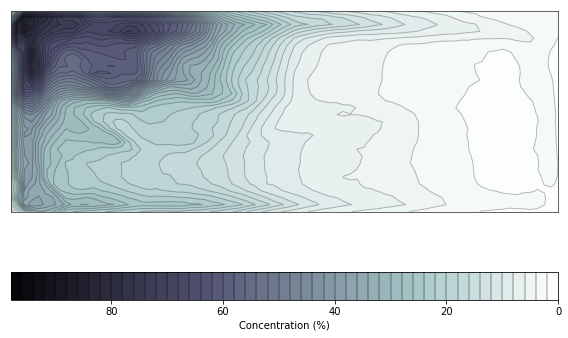

In [2]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, aspect="equal")
lw = 1

ax.set_xlim(0, 80-1)
ax.set_ylim(30-1, 0)
ax.set_xticks([])
ax.set_yticks([])
ax.spines['bottom'].set_color(EL.c_greyax)
ax.spines['top'].set_color(EL.c_greyax) 
ax.spines['right'].set_color(EL.c_greyax)
ax.spines['left'].set_color(EL.c_greyax)

name = './data/fluorescein/15-00_averages_nolarvae.csv'
df = pd.read_csv(name, header=None)
data = df.values
levels = np.arange(0, 100, 2)
imgc = ax.contourf(data, cmap="bone_r", levels=levels, alpha=1, extend="neither", 
                   vmin=0, vmax=100)
img1 = ax.contour(data, colors="k", levels=levels, extend="neither", 
                  linewidths=lw, vmin=0, vmax=100, alpha=0.25)

cbar = plt.colorbar(imgc, orientation="horizontal", drawedges=True, 
                    extend="neither", ticks=[0, 20, 40, 60, 80, 100], extendfrac=0)
cbar.ax.set_xlabel("Concentration (%)")
cbar.ax.set_xticklabels(np.arange(0, 101, 20))
cbar.ax.invert_xaxis()

# SET BOUNDARIES AND SAVE FIGURE -----------------------------------------------
plt.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.1)
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()
plt.show()